<a href="https://colab.research.google.com/github/SouraVMacwaN/Machine-LEARN-EASY-/blob/main/EDA_2_Flight_Price_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_excel('Data_Train.xlsx')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df_train.shape

(10683, 11)

In [4]:
df_test = pd.read_excel('Test_set.xlsx')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
df_test.shape

(2671, 10)

In [6]:
df = df_train.append(df_test)

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [8]:
df.shape

(13354, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [10]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [11]:
df.iloc[6474]

Airline                        Air India
Date_of_Journey                6/03/2019
Source                            Mumbai
Destination                    Hyderabad
Route              BOM → GOI → PNQ → HYD
Dep_Time                           16:50
Arrival_Time                       16:55
Duration                              5m
Total_Stops                      2 stops
Additional_Info                  No info
Price                            17327.0
Name: 6474, dtype: object

In [12]:
df['Day'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]

In [13]:
df = df.drop('Date_of_Journey' ,axis = 1)

In [14]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [15]:
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

In [16]:
df['Arrival_Time'] = df['Arrival_Time'].str[0:5]

In [17]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [18]:
df['Arrival_Hours'] = df['Arrival_Time'].str[0:2]
df['Arrival_Minutes'] = df['Arrival_Time'].str[3:5]

In [19]:
df = df.drop('Arrival_Time',axis = 1)

In [20]:
df['Arrival_Hours'] = df['Arrival_Hours'].astype(int)
df['Arrival_Minutes'] = df['Arrival_Minutes'].astype(int)

In [21]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10


In [22]:
df['Dep_Hours'] = df['Dep_Time'].str[0:2]
df['Dep_Minutes'] = df['Dep_Time'].str[3:5]
df['Dep_Hours'] = df['Dep_Hours'].astype(int)
df['Dep_Minutes'] = df['Dep_Minutes'].astype(int)

In [23]:
df = df.drop('Dep_Time',axis = 1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Day              13354 non-null  int64  
 9   Month            13354 non-null  int64  
 10  Year             13354 non-null  int64  
 11  Arrival_Hours    13354 non-null  int64  
 12  Arrival_Minutes  13354 non-null  int64  
 13  Dep_Hours        13354 non-null  int64  
 14  Dep_Minutes      13354 non-null  int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 1.6+ MB


Since we have data on Source and Destination we can just drop the Routes

In [25]:
df.drop('Route',axis = 1, inplace = True)

In [26]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Day                   0
Month                 0
Year                  0
Arrival_Hours         0
Arrival_Minutes       0
Dep_Hours             0
Dep_Minutes           0
dtype: int64

In [27]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [28]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes
9039,Air India,Delhi,Cochin,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [29]:
df[(df['Source'] == 'Delhi') & (df['Destination'] == 'Cochin')]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25
9,Multiple carriers,Delhi,Cochin,7h 50m,1 stop,No info,8625.0,27,5,2019,19,15,11,25
10,Air India,Delhi,Cochin,13h 15m,1 stop,No info,8907.0,1,6,2019,23,0,9,45
15,Air India,Delhi,Cochin,26h 35m,2 stops,No info,14011.0,3,3,2019,19,15,16,40
16,SpiceJet,Delhi,Cochin,4h 30m,1 stop,No info,5830.0,15,4,2019,13,15,8,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,Jet Airways,Delhi,Cochin,33h 15m,2 stops,No info,NaN,27,3,2019,4,25,19,10
2664,Multiple carriers,Delhi,Cochin,10h 15m,1 stop,No info,NaN,15,6,2019,1,30,15,15
2668,Jet Airways,Delhi,Cochin,6h 35m,1 stop,No info,NaN,6,3,2019,4,25,21,50
2669,Air India,Delhi,Cochin,15h 15m,1 stop,No info,NaN,6,3,2019,19,15,4,0


Roughly Delhi -> Cochin (26 hrs flight) : ~ 2 stops

In [30]:
df['Total_Stops'] = df['Total_Stops'].map({'nan':2,'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [31]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes
9039,Air India,Delhi,Cochin,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [32]:
df['Total_Stops'] = df['Total_Stops'].fillna(2)

In [33]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Duration              0
Total_Stops           0
Additional_Info       0
Price              2671
Day                   0
Month                 0
Year                  0
Arrival_Hours         0
Arrival_Minutes       0
Dep_Hours             0
Dep_Minutes           0
dtype: int64

In [34]:
df.dtypes

Airline             object
Source              object
Destination         object
Duration            object
Total_Stops        float64
Additional_Info     object
Price              float64
Day                  int64
Month                int64
Year                 int64
Arrival_Hours        int64
Arrival_Minutes      int64
Dep_Hours            int64
Dep_Minutes          int64
dtype: object

In [35]:
df['Duration'] = df['Duration'].str.split('h').str[0] + '.'+ df['Duration'].str.split('h').str[1].str.split('m').str[0]


In [36]:
df.head()


,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,2. 50,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7. 25,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19.,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5. 25,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4. 45,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [37]:
df['Duration'] = df['Duration'].str.replace(" ","")

In [38]:
df['Duration'] = df['Duration'].astype(float)

In [39]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes
0,IndiGo,Banglore,New Delhi,2.50,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7.25,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19.00,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5.25,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4.45,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [40]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
df['Airline'] = le.fit_transform(df['Airline'])
df['Source'] = le.fit_transform(df['Source'])
df['Destination'] = le.fit_transform(df['Destination'])
df['Additional_Info'] = le.fit_transform(df['Additional_Info'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  int64  
 1   Source           13354 non-null  int64  
 2   Destination      13354 non-null  int64  
 3   Duration         13352 non-null  float64
 4   Total_Stops      13354 non-null  float64
 5   Additional_Info  13354 non-null  int64  
 6   Price            10683 non-null  float64
 7   Day              13354 non-null  int64  
 8   Month            13354 non-null  int64  
 9   Year             13354 non-null  int64  
 10  Arrival_Hours    13354 non-null  int64  
 11  Arrival_Minutes  13354 non-null  int64  
 12  Dep_Hours        13354 non-null  int64  
 13  Dep_Minutes      13354 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 1.5 MB


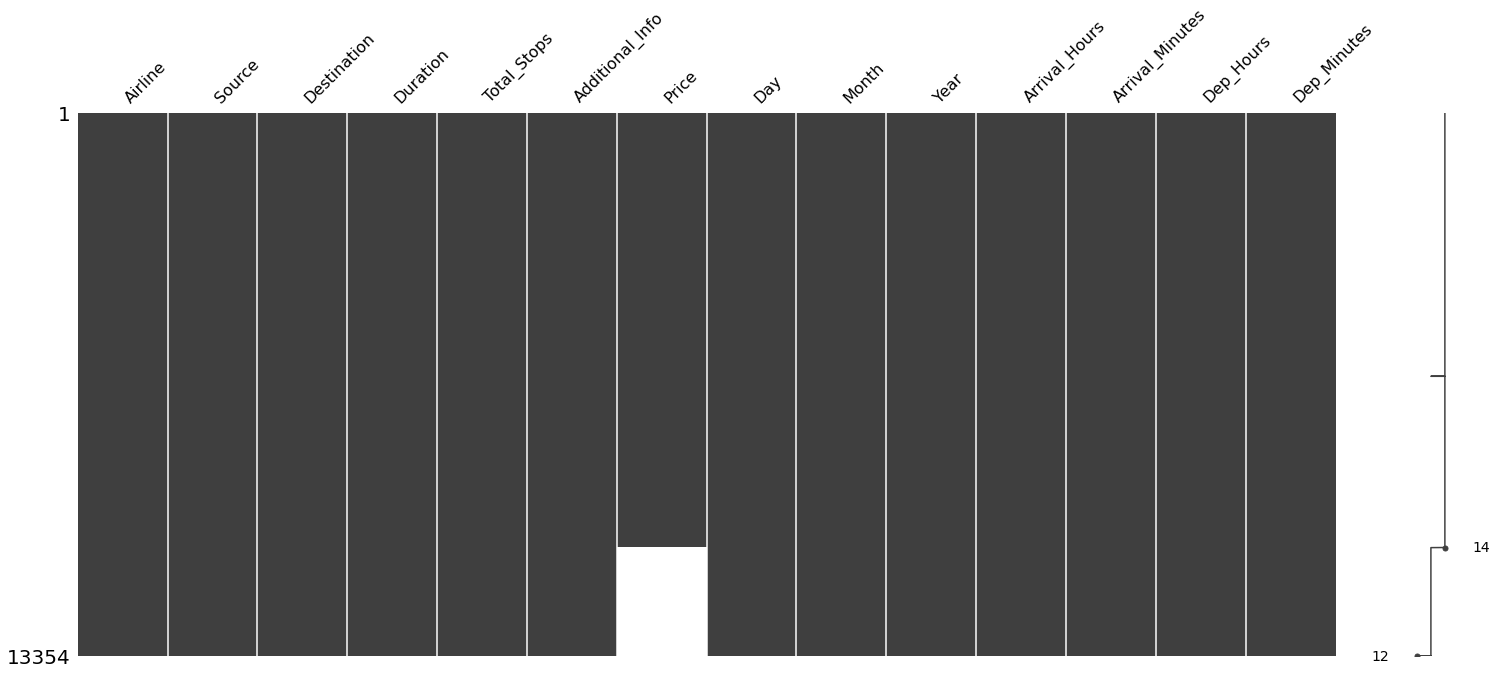

In [43]:
import missingno as msno
msno.matrix(df)

In [44]:
df.dropna(inplace=True)

In [45]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes,Dep_Hours,Dep_Minutes
0,3,0,5,2.50,0.0,8,3897.0,24,3,2019,1,10,22,20
1,1,3,0,7.25,2.0,8,7662.0,1,5,2019,13,15,5,50
2,4,2,1,19.00,2.0,8,13882.0,9,6,2019,4,25,9,25
3,3,3,0,5.25,1.0,8,6218.0,12,5,2019,23,30,18,5
4,3,0,5,4.45,1.0,8,13302.0,1,3,2019,21,35,16,50


In [46]:
df_test = df[df['Price'].isnull()]
df_train = df[df['Price'].notnull()]

In [47]:
X = df_train.drop(['Price'],axis = 1)
y = df_train['Price']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state = 45)

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Decision Tree Regressor

In [120]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [121]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_test)
score=r2_score(y_test,y_pred)
print(score)

0.7922433673542087


Random Forest Regressor

In [128]:
from sklearn.ensemble import RandomForestRegressor
Rand_FR = RandomForestRegressor(n_estimators=200, n_jobs=2)

Rand_FR.fit(X_train, y_train)
y_pred_rf = Rand_FR.predict(X_test)

In [129]:
score=r2_score(y_test,y_pred_rf)
print(score)

0.8699962026152649


In [97]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [99]:
y_pred_rf = lm.predict(X_test)
score=r2_score(y_test,y_pred_rf)
print(score)

0.41311835607425784


Random Forest Regressor has the Best Score with R2 value as : 0.869